# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

lat = []
lng = []
temp = []
humid = []
cloud = []
wind_speed = []
new_city = []



print("Begin Data Retrieval:")
print('-----------------------')

for city in cities: 
    response = requests.get(query_url + city).json()
    
    try: 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        new_city.append(city)
        print(f"Data for {city} found. Appending stats")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        print(f"No data found for {city}")
    

Begin Data Retrieval:
-----------------------
Data for youghal found. Appending stats
Data for bredasdorp found. Appending stats
Data for punta arenas found. Appending stats
Data for vao found. Appending stats
Data for bethel found. Appending stats
Data for iranshahr found. Appending stats
Data for victoria found. Appending stats
Data for yellowknife found. Appending stats
No data found for saleaula
Data for qaanaaq found. Appending stats
Data for ahuimanu found. Appending stats
Data for hobart found. Appending stats
Data for grindavik found. Appending stats
Data for hithadhoo found. Appending stats
Data for goderich found. Appending stats
Data for morehead found. Appending stats
Data for sao filipe found. Appending stats
Data for busselton found. Appending stats
Data for mahebourg found. Appending stats
Data for havre-saint-pierre found. Appending stats
Data for manavalakurichi found. Appending stats
Data for georgetown found. Appending stats
Data for rikitea found. Appending stats
Da

In [42]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

fahrenheit = [1.8*(i-273.15)+32 for i in temp]

weather_dict =  {
    "City": new_city,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp (F)": fahrenheit,
    "Humidity (%)": humid,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wind_speed
}

weather_data = pd.DataFrame(weather_dict)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [44]:
weather_data.to_csv('weather_data.csv', index = False, header = True)

In [45]:
weather_data.head()

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,youghal,51.95,-7.85,57.992,82,75,6.20
1,bredasdorp,-34.53,20.04,42.800,81,65,2.10
2,punta arenas,-53.15,-70.92,30.200,86,92,2.10
3,vao,-22.67,167.48,70.700,84,1,6.21
4,bethel,41.37,-73.41,64.994,93,1,1.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [62]:
weather_humid = weather_data.loc[(weather_data['Humidity (%)']<=100)]
weather_humid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              532 non-null    object 
 1   Latitude          532 non-null    float64
 2   Longitude         532 non-null    float64
 3   Max Temp (F)      532 non-null    float64
 4   Humidity (%)      532 non-null    int64  
 5   Cloudiness (%)    532 non-null    int64  
 6   Wind Speed (mph)  532 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 33.2+ KB


In [7]:
#  Get the indices of cities that have humidity over 100%.
### None over 100% humidity

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

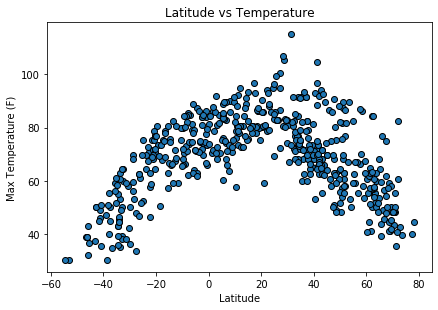

In [86]:
plt.scatter(weather_data['Latitude'], weather_data['Max Temp (F)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../output_data/lat&temp.png')

## Latitude vs. Humidity Plot

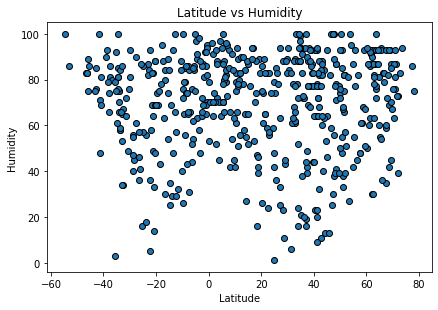

In [87]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../output_data/lat&humid.png')

## Latitude vs. Cloudiness Plot

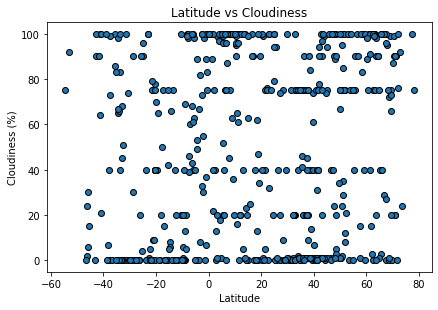

In [88]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/lat&cloud.png')

## Latitude vs. Wind Speed Plot

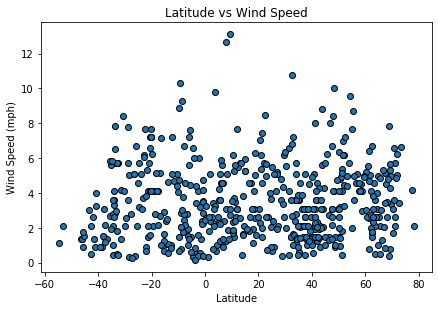

In [89]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed (mph)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/lat&wind.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


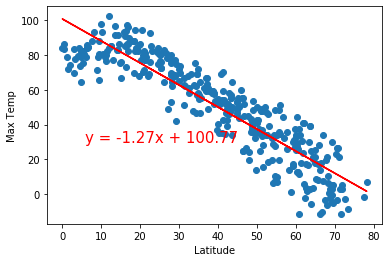

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


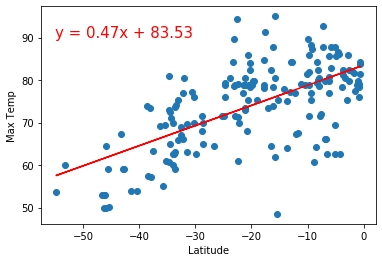

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


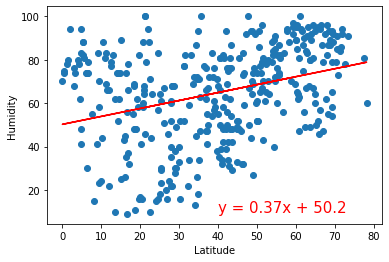

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


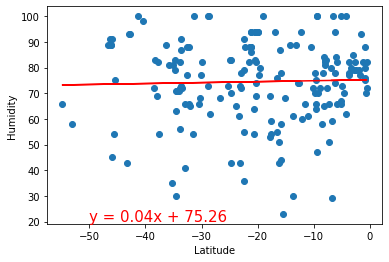

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


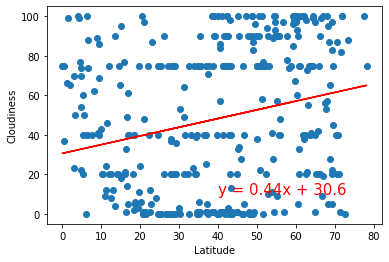

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


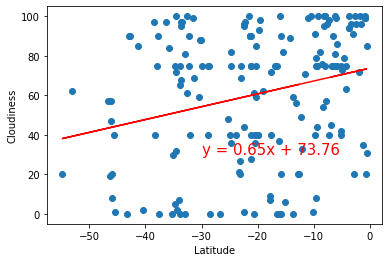

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


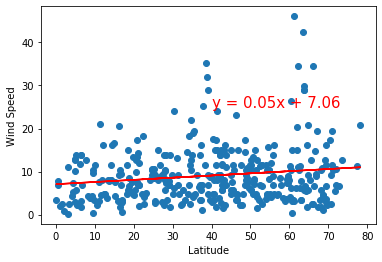

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


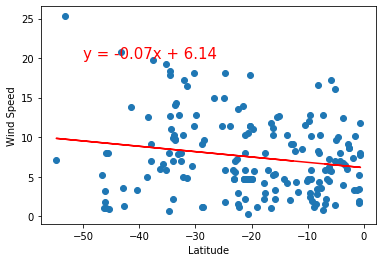